<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


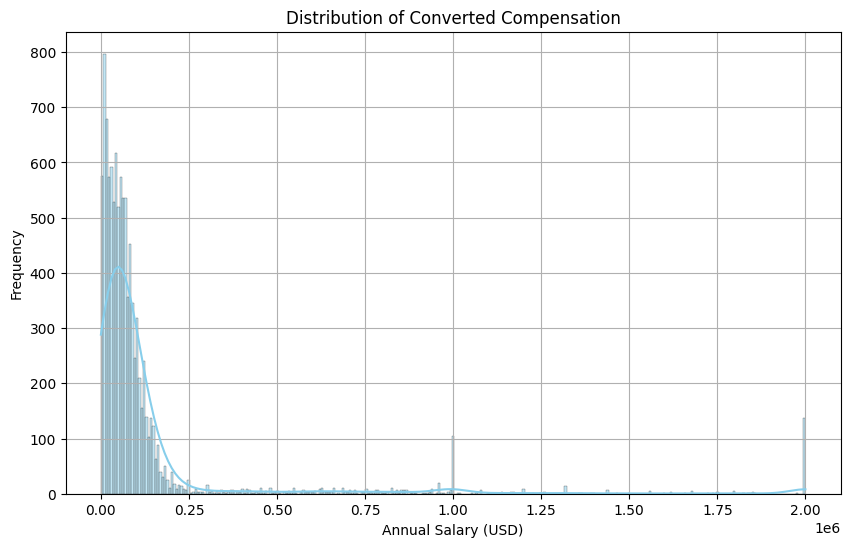

In [3]:
# Plotting the distribution curve for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['ConvertedComp'], kde=True, color='skyblue')  # Plot the histogram with kernel density estimation
plt.title('Distribution of Converted Compensation')  # Set the title of the plot
plt.xlabel('Annual Salary (USD)')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot


Plot the histogram for the column `ConvertedComp`.


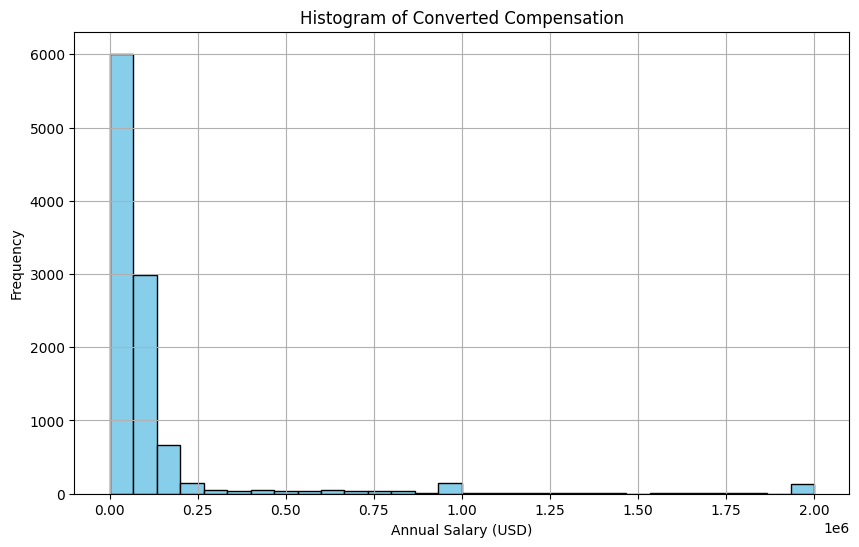

In [5]:
# Plotting the histogram for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')  # Plot the histogram
plt.title('Histogram of Converted Compensation')  # Set the title of the plot
plt.xlabel('Annual Salary (USD)')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot


What is the median of the column `ConvertedComp`?


In [6]:
# Calculate the median of the column 'ConvertedComp'
median_converted_comp = df['ConvertedComp'].median()

print("Median of the column ConvertedComp:", median_converted_comp)


Median of the column ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# Count the number of responders who identified themselves only as a Man
num_man_responders = df[df['Gender'] == 'Man'].shape[0]

print("Number of responders who identified themselves only as a Man:", num_man_responders)

Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# Filter the DataFrame to include only rows where Gender is 'Woman'
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp of responders identified themselves only as a Woman
median_converted_comp_woman = woman_df['ConvertedComp'].median()

print("Median ConvertedComp of responders identified themselves only as a Woman:", median_converted_comp_woman)


Median ConvertedComp of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# Calculate the five-number summary for the column 'Age'
five_num_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])

print("Five-number summary for the column Age:")
print(five_num_summary_age[['min', '25%', '50%', '75%', 'max']])


Five-number summary for the column Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


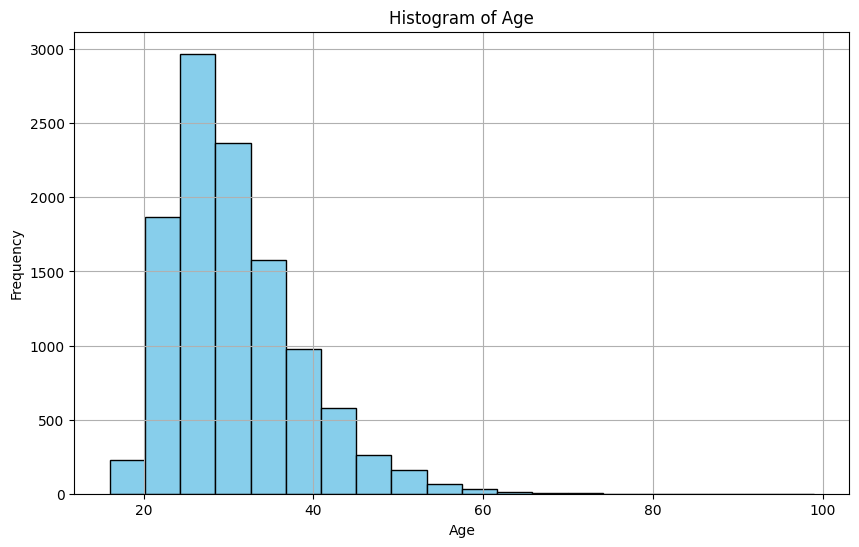

In [10]:
# Plotting the histogram for the column 'Age'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')  # Plot the histogram
plt.title('Histogram of Age')  # Set the title of the plot
plt.xlabel('Age')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


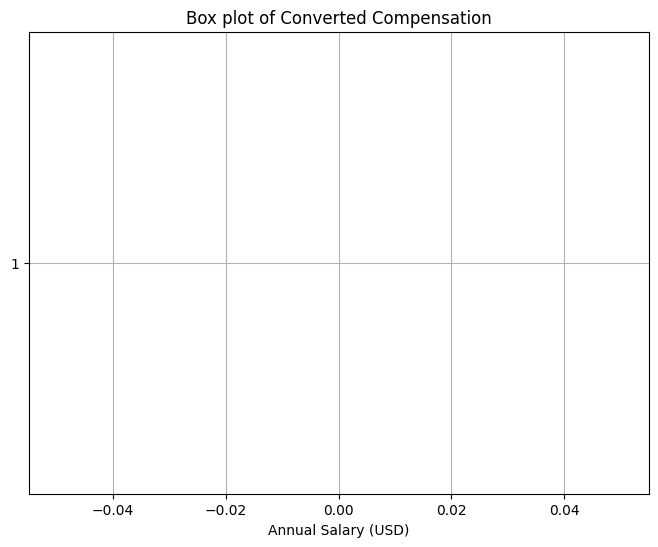

In [7]:
# Plotting a box plot for the column 'ConvertedComp'
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(df['ConvertedComp'], vert=False)  # Plot the box plot horizontally
plt.title('Box plot of Converted Compensation')  # Set the title of the plot
plt.xlabel('Annual Salary (USD)')  # Set the label for the x-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [8]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Inter Quartile Range (IQR)
IQR = Q3 - Q1

print("Inter Quartile Range (IQR) for the column ConvertedComp:", IQR)


Inter Quartile Range (IQR) for the column ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [9]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

print("Upper bound for outliers:", upper_bound)
print("Lower bound for outliers:", lower_bound)

Upper bound for outliers: 209698.0
Lower bound for outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in the ConvertedComp column:", num_outliers)


Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [10]:
# Create a new DataFrame by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the first few rows of the new DataFrame
print("New DataFrame after removing outliers:")
print(df_no_outliers.head())


New DataFrame after removing outliers:
   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than p

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# Load the CSV data into a pandas DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# Find the correlation between Age and all other numerical columns
correlation_age = df.corr()['Age']

print("Correlation between Age and all other numerical columns:")
print(correlation_age)

In [4]:
# Calculate the median age of survey respondents
median_age = df['Age'].median()

print("Median Age of survey respondents:", median_age)

Median Age of survey respondents: 29.0


In [5]:
# Calculate the median ConvertedComp before removing outliers
median_converted_comp_before = df['ConvertedComp'].median()

print("Median ConvertedComp before removing outliers:", median_converted_comp_before)

Median ConvertedComp before removing outliers: 57745.0


In [11]:
# Calculate the median ConvertedComp after removing outliers
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

print("Median ConvertedComp after removing outliers:", median_converted_comp_after)


Median ConvertedComp after removing outliers: 52704.0


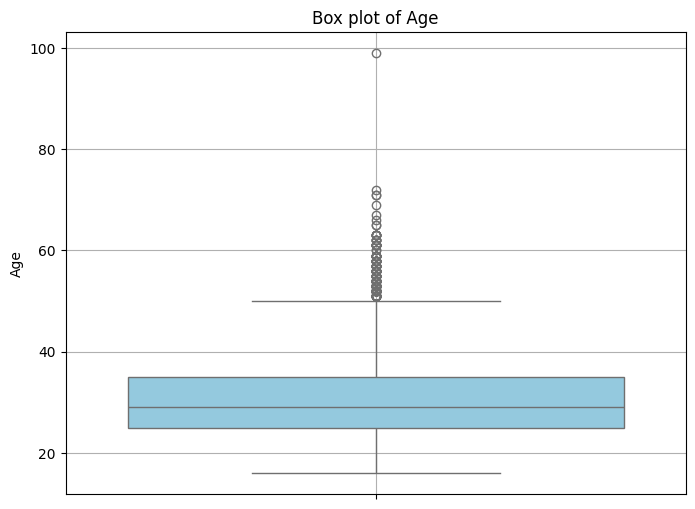

In [12]:
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Box plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [13]:
# Calculate the mean ConvertedComp after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)

Mean ConvertedComp after removing outliers: 59883.20838915799


In [15]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation between Age and all other numerical columns
correlation_age = numeric_df.corr()['Age']

# Find the column with a negative correlation with Age
neg_correlation_columns = correlation_age[correlation_age < 0]

print("Column(s) with negative correlation with Age:")
print(neg_correlation_columns)

Column(s) with negative correlation with Age:
CodeRevHrs   -0.020469
Name: Age, dtype: float64


In [17]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation between Age and all other numerical columns
correlation_age = numeric_df.corr()['Age']

# Remove the correlation with Age itself
correlation_age = correlation_age.drop('Age')

# Find the column with the highest correlation with Age
highest_correlation_column = correlation_age.idxmax()

print("Column with the highest correlation with Age:", highest_correlation_column)

Column with the highest correlation with Age: ConvertedComp


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
